# Import Libraries + CSVs

## Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

## CSVs

In [5]:
clickstream_df = pd.read_csv('feature_clickstream.csv')
attributes_df = pd.read_csv('features_attributes.csv')
financials_df = pd.read_csv('features_financials.csv')
loan_daily_df = pd.read_csv('lms_loan_daily.csv')

# Dataframes

Take a look at the top 5 rows for an idea of how the data looks like

## clickstream_df

In [8]:
clickstream_df.head()

,fe_1,fe_2,fe_3,fe_4,fe_5,fe_6,fe_7,fe_8,fe_9,fe_10,...,fe_13,fe_14,fe_15,fe_16,fe_17,fe_18,fe_19,fe_20,Customer_ID,snapshot_date
0,63,118,80,121,55,193,111,112,-101,83,...,-16,-81,-126,114,35,85,-73,76,CUS_0x1037,2023-01-01
1,-108,182,123,4,-56,27,25,-6,284,222,...,-14,-96,200,35,130,94,111,75,CUS_0x1069,2023-01-01
2,-13,8,87,166,214,-98,215,152,129,139,...,26,86,171,125,-130,354,17,302,CUS_0x114a,2023-01-01
3,-85,45,200,89,128,54,76,51,61,139,...,172,96,174,163,37,207,180,118,CUS_0x1184,2023-01-01
4,55,120,226,-86,253,97,107,68,103,126,...,76,43,183,159,-26,104,118,184,CUS_0x1297,2023-01-01


## attributes_df

In [10]:
attributes_df.head()

,Customer_ID,Name,Age,SSN,Occupation,snapshot_date
0,CUS_0x1000,Alistair Barrf,18,913-74-1218,Lawyer,2023-05-01
1,CUS_0x1009,Arunah,26,063-67-6938,Mechanic,2025-01-01
2,CUS_0x100b,Shirboni,19,#F%$D@*&8,Media_Manager,2024-03-01
3,CUS_0x1011,Schneyerh,44,793-05-8223,Doctor,2023-11-01
4,CUS_0x1013,Cameront,44,930-49-9615,Mechanic,2023-12-01


## financials_df

In [12]:
financials_df.head()

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date
0,CUS_0x1000,30625.94,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",57,26,...,Bad,1562.91,30.077191,10 Years and 9 Months,Yes,42.941090,77.31427572208112,High_spent_Medium_value_payments,400.36080052211616,2023-05-01
1,CUS_0x1009,52312.68_,4250.390000,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",5,18,...,_,202.68,40.286997,31 Years and 0 Months,Yes,108.366467,58.66019164829086,High_spent_Medium_value_payments,508.01234122645366,2025-01-01
2,CUS_0x100b,113781.38999999998,9549.782500,1,4,1,0,NaN,14,8,...,Good,1030.2,28.592943,15 Years and 10 Months,No,0.000000,617.0792665202719,High_spent_Small_value_payments,597.8989834797281,2024-03-01
3,CUS_0x1011,58918.47,5208.872500,3,3,17,3,"Student Loan, Credit-Builder Loan, and Debt Co...",27,13,...,Standard,473.14,27.829959,15 Years and 10 Months,Yes,123.434939,383.35084463651407,Low_spent_Medium_value_payments,294.1014665671429,2023-11-01
4,CUS_0x1013,98620.98,7962.415000,3,3,6,3,"Student Loan, Debt Consolidation Loan, and Per...",12,9,...,Good,1233.51,26.524864,17 Years and 10 Months,No,228.018084,332.3337079767732,High_spent_Medium_value_payments,485.8897083704929,2023-12-01


## loan_daily_df

In [14]:
loan_daily_df.head()

,loan_id,Customer_ID,loan_start_date,tenure,installment_num,loan_amt,due_amt,paid_amt,overdue_amt,balance,snapshot_date
0,CUS_0x1000_2023_05_01,CUS_0x1000,2023-05-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-05-01
1,CUS_0x1000_2023_05_01,CUS_0x1000,2023-05-01,10,1,10000,1000.0,1000.0,0.0,9000.0,2023-06-01
2,CUS_0x1000_2023_05_01,CUS_0x1000,2023-05-01,10,2,10000,1000.0,1000.0,0.0,8000.0,2023-07-01
3,CUS_0x1000_2023_05_01,CUS_0x1000,2023-05-01,10,3,10000,1000.0,0.0,1000.0,8000.0,2023-08-01
4,CUS_0x1000_2023_05_01,CUS_0x1000,2023-05-01,10,4,10000,1000.0,2000.0,0.0,6000.0,2023-09-01


# Data Pre-Processing

## Check for Null values

In [17]:
for df, name in zip([clickstream_df, attributes_df, financials_df, loan_daily_df],
                    ['Clickstream', 'Attributes', 'Financials', 'Loan']):
    print(f"\nMissing Values in {name}:")
    print(df.isnull().sum())


Missing Values in Clickstream:
fe_1             0
fe_2             0
fe_3             0
fe_4             0
fe_5             0
fe_6             0
fe_7             0
fe_8             0
fe_9             0
fe_10            0
fe_11            0
fe_12            0
fe_13            0
fe_14            0
fe_15            0
fe_16            0
fe_17            0
fe_18            0
fe_19            0
fe_20            0
Customer_ID      0
snapshot_date    0
dtype: int64

Missing Values in Attributes:
Customer_ID      0
Name             0
Age              0
SSN              0
Occupation       0
snapshot_date    0
dtype: int64

Missing Values in Financials:
Customer_ID                    0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                1426
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Lim

From above, we can see that "Type_of_Loan" has a siginificant amount of NULL values in the "financials_df" dataframe. We will remove them so as to ensure data integrity and compatibility for accurate analysis and processing.

In [19]:
## Carry out the removing of rows here ##

# Individual Dataframe Exploration

## clickstream_df

### fe_1 to fe_20

In [23]:
# Step 1: Select only fe_1 to fe_20 columns
fe_columns = [f'fe_{i}' for i in range(1, 21)]
fe_df = clickstream_df[fe_columns]

# Step 2: Check for non-integer values in each column
non_integer_mask = ~fe_df.map(lambda x: isinstance(x, int))

# Step 3: Identify rows and columns with invalid entries
invalid_entries = fe_df[non_integer_mask.any(axis=1)]

# Step 4: Count total invalid entries per column
invalid_counts = non_integer_mask.sum()

# Show results
print("Invalid entry count per column:")
print(invalid_counts)
print(f"\nTotal rows with at least one non-integer: {invalid_entries.shape[0]}")
print("\nSample rows with invalid entries (if any):")
print(invalid_entries.head())

Invalid entry count per column:
fe_1     0
fe_2     0
fe_3     0
fe_4     0
fe_5     0
fe_6     0
fe_7     0
fe_8     0
fe_9     0
fe_10    0
fe_11    0
fe_12    0
fe_13    0
fe_14    0
fe_15    0
fe_16    0
fe_17    0
fe_18    0
fe_19    0
fe_20    0
dtype: int64

Total rows with at least one non-integer: 0

Sample rows with invalid entries (if any):
Empty DataFrame
Columns: [fe_1, fe_2, fe_3, fe_4, fe_5, fe_6, fe_7, fe_8, fe_9, fe_10, fe_11, fe_12, fe_13, fe_14, fe_15, fe_16, fe_17, fe_18, fe_19, fe_20]
Index: []


### Customer_ID

In [25]:
# Define regex pattern for a valid Customer_ID
customer_id_pattern = r'^CUS_0x[0-9a-fA-F]+$'

# Apply pattern to validate
clickstream_df['Customer_ID_Valid'] = clickstream_df['Customer_ID'].str.match(customer_id_pattern)

# Identify invalid Customer_ID entries
invalid_customer_ids = clickstream_df[~clickstream_df['Customer_ID_Valid']]

# Display results
print(f"Total invalid Customer_IDs: {len(invalid_customer_ids)}")
print("\nSample invalid Customer_IDs:")
print(invalid_customer_ids['Customer_ID'].drop_duplicates().head())

Total invalid Customer_IDs: 0

Sample invalid Customer_IDs:
Series([], Name: Customer_ID, dtype: object)


### snapshot_date

In [27]:
# Define strict pattern: YYYY-MM-DD
snapshot_date_pattern = r'^\d{4}-\d{2}-\d{2}$'

# Step 1: Validate with regex
clickstream_df['Snapshot_Format_Valid'] = clickstream_df['snapshot_date'].str.match(snapshot_date_pattern)

# Step 2: Parse valid-looking dates to ensure they're real
clickstream_df['snapshot_date_parsed'] = pd.to_datetime(
    clickstream_df['snapshot_date'], format='%Y-%m-%d', errors='coerce'
)

# Step 3: Final check: valid format AND valid date
clickstream_df['Snapshot_Date_Valid'] = (
    clickstream_df['Snapshot_Format_Valid'] &
    clickstream_df['snapshot_date_parsed'].notna()
)

# Show invalid results
invalid_dates_df = clickstream_df[~clickstream_df['Snapshot_Date_Valid']]

print(f"Total invalid snapshot_date entries: {len(invalid_dates_df)}")
print("\nSample invalid snapshot_date values:")
print(invalid_dates_df['snapshot_date'].drop_duplicates().head())

Total invalid snapshot_date entries: 0

Sample invalid snapshot_date values:
Series([], Name: snapshot_date, dtype: object)


## attributes_df

### Customer_ID

In [30]:
# Check for Customer_IDs that do not match the "CUS_0x" pattern
invalid_customer_ids = attributes_df[~attributes_df['Customer_ID'].str.match(r'^CUS_0x[0-9a-fA-F]+$')]

# Show sample of invalid Customer_IDs
invalid_customer_ids_sample = invalid_customer_ids[['Customer_ID']].drop_duplicates().head(10)

# Count total number of invalid entries
invalid_customer_id_count = invalid_customer_ids['Customer_ID'].nunique()

print("Sample of invalid Customer_IDs:")
print(invalid_customer_ids_sample)
print(f"\nTotal number of invalid Customer_IDs: {invalid_customer_id_count}")

Sample of invalid Customer_IDs:
Empty DataFrame
Columns: [Customer_ID]
Index: []

Total number of invalid Customer_IDs: 0


From the above code we can be sure that there are no invalid customer IDs present and we can move forward

### Name

What This Flags as Invalid:
- Names with numbers (John123)
- Symbols or gibberish (@#!~, Dr., %%_Shane)
- Overly short or blank names
- Very long strings (likely not real names)

In [33]:
# Step 1: Basic cleanup
attributes_df['Name'] = attributes_df['Name'].astype(str).str.strip()

# Step 2: Define validity conditions
valid_name_pattern = r"^[A-Za-z\s\-']+$"
is_not_empty = attributes_df['Name'] != ''
matches_pattern = attributes_df['Name'].str.match(valid_name_pattern)
reasonable_length = attributes_df['Name'].str.len().between(2, 50)

# Step 3: Combine all conditions
attributes_df['Valid_Name'] = is_not_empty & matches_pattern & reasonable_length

# Step 4: Preview invalid names
invalid_names_df = attributes_df[~attributes_df['Valid_Name']]
print(invalid_names_df[['Customer_ID', 'Name']].head(10))
print(f"\nTotal invalid names: {len(invalid_names_df)}")

    Customer_ID        Name
12   CUS_0x1038         B.h
101  CUS_0x11ac   Liana B.v
134  CUS_0x124a         B.d
156  CUS_0x129b         N.w
173  CUS_0x12dd   Liana B.v
203  CUS_0x1354         N.p
217  CUS_0x138d  ODonnell"d
286  CUS_0x148e         N.o
380  CUS_0x162f    OLeary"k
402  CUS_0x1680  ODonnell"i

Total invalid names: 269


However as the names of our customers are not important to use, as long as the data provided is useful we shall move forward. We can likely ignore this column all-together.

### Age

We shall take a look at the age distribution

In [36]:
# Convert Age to numeric
attributes_df['Age'] = pd.to_numeric(attributes_df['Age'])

# Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(attributes_df['Age'].dropna(), bins=30, kde=True, color='slateblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: Unable to parse string "40_" at position 10

We encounter an error showing as that some of the ages are not just numericals, we shall fix those first.

We shall create a few buckets to take a look at the different age ranges available as well.

In [49]:
# Reload original dataset
attributes_raw_df = pd.read_csv('features_attributes.csv')

# Keep raw 'Age' as string
attributes_raw_df['Age'] = attributes_raw_df['Age'].astype(str)

# Convert Age to numeric for bucketing
attributes_df = attributes_raw_df.copy()
attributes_df['Age_numeric'] = pd.to_numeric(attributes_df['Age'], errors='coerce')

# Define bins and labels
bins = [17, 25, 35, 45, 55, 65, 75, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']

# Bucket ages and assign 'Invalid' to anything that doesn't fit
attributes_df['Age_Group'] = pd.cut(attributes_df['Age_numeric'], bins=bins, labels=labels)
attributes_df['Age_Group'] = attributes_df['Age_Group'].astype('category').cat.add_categories('Invalid')
attributes_df['Age_Group'] = attributes_df['Age_Group'].fillna('Invalid')  # Changed line

# Filter and preview rows with invalid age group
invalid_age_rows = attributes_df[attributes_df['Age_Group'] == 'Invalid']
print(invalid_age_rows[['Customer_ID', 'Age', 'Age_numeric', 'Age_Group']].head(10))

   Customer_ID    Age  Age_numeric Age_Group
6   CUS_0x1018     15         15.0   Invalid
10  CUS_0x1032    40_          NaN   Invalid
14  CUS_0x1041     15         15.0   Invalid
22  CUS_0x1057    46_          NaN   Invalid
29  CUS_0x107c     15         15.0   Invalid
30  CUS_0x107e     15         15.0   Invalid
50  CUS_0x10e7  3843_          NaN   Invalid
52  CUS_0x10ee    30_          NaN   Invalid
62  CUS_0x111c    24_          NaN   Invalid
63  CUS_0x1123     15         15.0   Invalid


From above we can see that there seem to be some customers who are younger than the legal age of 18 and the rest are age values with an _ connected to them causing the error. So we shall clean those up first then carry out the categorisation once again.

In [51]:
# Reload original dataset
attributes_df = pd.read_csv('features_attributes.csv')

# Step 1: Clean Age column (remove any underscores and convert to numeric)
attributes_df['Age'] = attributes_df['Age'].astype(str).str.replace('_', '', regex=False)
attributes_df['Age'] = pd.to_numeric(attributes_df['Age'], errors='coerce')

# Step 2: Convert Age to integer (drop NaNs before conversion to avoid errors)
attributes_df['Age'] = attributes_df['Age'].dropna().astype(int)

# Step 3: Recheck for missing values in Age column
missing_ages_after_cleaning = attributes_df['Age'].isna().sum()

missing_ages_after_cleaning

0

Here is how the age distribution looks like !!! MAKE GRAPH NICER !!!

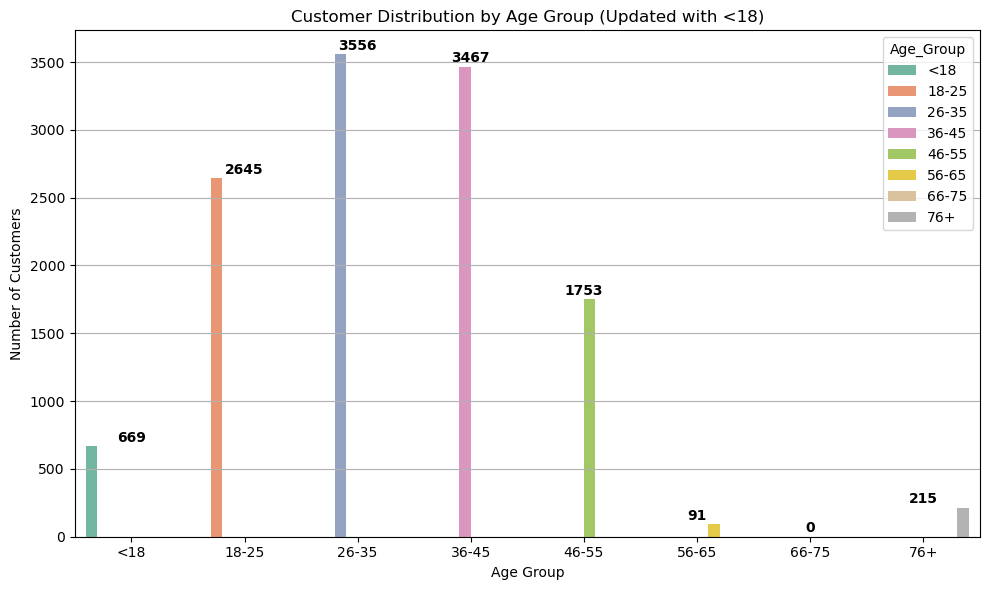

In [53]:
# Define new bins and labels including "Below 18"
bins = [0, 17, 25, 35, 45, 55, 65, 75, float('inf')]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']

# Recreate age groups using cleaned integer Age values
attributes_df['Age_Group'] = pd.cut(attributes_df['Age'], bins=bins, labels=labels, right=True)

# Plot the updated age group distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=attributes_df, x='Age_Group', hue='Age_Group', order=labels, palette='Set2')
plt.title('Customer Distribution by Age Group (Updated with <18)')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y')

# Annotate the bar counts
age_group_counts = attributes_df['Age_Group'].value_counts().reindex(labels)
for i, count in enumerate(age_group_counts):
    ax.text(i, count + 10, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# # Define new bins and labels including "Below 18"
# bins = [0, 17, 25, 35, 45, 55, 65, 75, float('inf')]
# labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']

# # Recreate age groups using cleaned integer Age values
# attributes_df['Age_Group'] = pd.cut(attributes_df['Age'], bins=bins, labels=labels, right=True)

# # Plot the updated age group distribution
# plt.figure(figsize=(10, 6))
# ax = sns.countplot(
#     data=attributes_df,
#     x='Age_Group',
#     hue='Age_Group',  # Added this
#     order=labels,
#     palette='Set2',
#     legend=False # Added this to suppress redundant legend
# )
# plt.title('Customer Distribution by Age Group (Updated with <18)')
# plt.xlabel('Age Group')
# plt.ylabel('Number of Customers')
# plt.grid(True, axis='y')

# # Annotate the bar counts
# age_group_counts = attributes_df['Age_Group'].value_counts().reindex(labels)
# for i, count in enumerate(age_group_counts):
#     ax.text(i, count + 10, str(count), ha='center', va='bottom', fontweight='bold')

# plt.tight_layout()
# plt.show()

From the graph above we can remove anybody in the age group of "<18", "76+" and "66-75" as we can infer that the age limit to acquire a loan would be between 18 and 65 years old by the financial institution

In [55]:
## Carry out the removing and re-draw the distribution to showcase the cleaning ##

### SSN

We would like to ensure all the Social Security Numbers are valid. Upon first glance above from the .head() done on attributes_df, we can already see an invalid case.

In [57]:
import re
# Define SSN validation pattern: format "XXX-XX-XXXX" where X is a digit
valid_ssn_pattern = re.compile(r'^\d{3}-\d{2}-\d{4}$')

# Create a boolean mask for valid SSNs
attributes_df['SSN_Valid'] = attributes_df['SSN'].apply(lambda x: bool(valid_ssn_pattern.match(str(x))))

# Count valid and invalid SSNs
ssn_counts = attributes_df['SSN_Valid'].value_counts().rename(index={True: 'Valid', False: 'Invalid'})

ssn_counts

SSN_Valid
Valid      11797
Invalid      703
Name: count, dtype: int64

Let us remove the invalid rows and then continue.

In [59]:
## Remove Invalid Row Code ##

### Occupation

Take a look at various occupations

In [61]:
# Count unique occupations
occupation_counts = attributes_df['Occupation'].value_counts(dropna=False).reset_index()
occupation_counts.columns = ['Occupation', 'Count']

# Display the table
print(occupation_counts)

       Occupation  Count
0         _______    880
1          Lawyer    828
2       Architect    795
3        Engineer    793
4      Accountant    791
5       Scientist    789
6         Teacher    782
7        Mechanic    780
8   Media_Manager    780
9       Developer    780
10   Entrepreneur    776
11     Journalist    761
12         Doctor    760
13       Musician    741
14        Manager    736
15         Writer    728


Let's take a look at some rows with occupations as "______"

In [63]:
# Filter rows with unknown occupation
unknown_jobs_df = attributes_df[attributes_df['Occupation'] == '_______']

# Show the first 10 such rows
print(unknown_jobs_df.head(10))

    Customer_ID               Name   Age          SSN Occupation  \
15   CUS_0x1044      Maki Shirakip    44    #F%$D@*&8    _______   
19   CUS_0x104f              Markm    20  264-84-8069    _______   
34   CUS_0x1098             Krudyz    23  466-10-5742    _______   
45   CUS_0x10c5              Moony    24  041-74-6785    _______   
50   CUS_0x10e7             Carewj  3843  094-89-6380    _______   
53   CUS_0x10f9  Gilles Guillaumev    54  746-79-6875    _______   
67   CUS_0x1130         Elizabethr    37  846-60-3664    _______   
91   CUS_0x1183            Barlyna    22  972-42-3182    _______   
98   CUS_0x1197             Nayako    28  799-23-8283    _______   
103  CUS_0x11b1             Browne    28  347-47-6952    _______   

    snapshot_date Age_Group  SSN_Valid  
15     2023-06-01     36-45      False  
19     2024-10-01     18-25       True  
34     2025-01-01     18-25       True  
45     2024-08-01     18-25       True  
50     2024-11-01       76+       True  
53   

We shall remove any customer with an invalid occupation as it may affect our findings down the road OR 

We shall keep these customers information however if there is any analysis requiring a customers occupation, they shall be excluded

### Snapshot_date

Just to ensure all the snapshot dates are valid

In [66]:
# Try converting snapshot_date to datetime
attributes_df['snapshot_date_parsed'] = pd.to_datetime(attributes_df['snapshot_date'], errors='coerce')

# Find rows where the date couldn't be parsed
invalid_dates_df = attributes_df[attributes_df['snapshot_date_parsed'].isna()]

# Count of invalid snapshot dates
invalid_snapshot_date_count = invalid_dates_df.shape[0]

# Show sample invalid rows
invalid_snapshot_date_sample = invalid_dates_df[['Customer_ID', 'snapshot_date']].head(10)

print("Sample of invalid snapshot_date entries:")
print(invalid_snapshot_date_sample)
print(f"\nTotal number of invalid snapshot_date values: {invalid_snapshot_date_count}")

Sample of invalid snapshot_date entries:
Empty DataFrame
Columns: [Customer_ID, snapshot_date]
Index: []

Total number of invalid snapshot_date values: 0


## loan_daily_df

### loan_id

Check for validity of every value

In [69]:
# Define pattern: CUS_0x[hex]_YYYY_MM_DD
loan_id_pattern = r'^CUS_0x[0-9a-fA-F]+_\d{4}_\d{2}_\d{2}$'

# Apply regex match to classify valid loan_id entries
loan_daily_df['loan_id_valid'] = loan_daily_df['loan_id'].str.match(loan_id_pattern)

# Extract invalid loan_id entries
invalid_loan_ids = loan_daily_df[~loan_daily_df['loan_id_valid']]

# Count of invalid loan_ids
invalid_loan_id_count = invalid_loan_ids.shape[0]

# Display sample
invalid_loan_id_sample = invalid_loan_ids[['loan_id']].drop_duplicates().head(10)

print("Sample of invalid loan_id entries:")
print(invalid_loan_id_sample)
print(f"\nTotal number of invalid loan_id values: {invalid_loan_id_count}")

Sample of invalid loan_id entries:
Empty DataFrame
Columns: [loan_id]
Index: []

Total number of invalid loan_id values: 0


We shall move on to the next column as all rows are valid.

### customer_id

Check for validity of every values

In [72]:
# Check for Customer_IDs in loan_daily_df that do not match the "CUS_0x" pattern
mask = loan_daily_df['Customer_ID'].str.match(r'^CUS_0x[0-9a-fA-F]+$', na=False)
invalid_customer_ids = loan_daily_df[~mask]  # Directly filter loan_daily_df

# Show sample of invalid Customer_IDs
invalid_customer_ids_sample = invalid_customer_ids[['Customer_ID']].drop_duplicates().head(10)

# Count total number of invalid entries
invalid_customer_id_count = invalid_customer_ids['Customer_ID'].nunique()

print("Sample of invalid Customer_IDs:")
print(invalid_customer_ids_sample)
print(f"\nTotal number of invalid Customer_IDs: {invalid_customer_id_count}")

Sample of invalid Customer_IDs:
Empty DataFrame
Columns: [Customer_ID]
Index: []

Total number of invalid Customer_IDs: 0


We shall move on to the next column as all rows are valid.

### loan_start_date

Check for validity of every values

In [75]:
# Check for valid YYYY-MM-DD format
valid_format_mask = pd.to_datetime(
    loan_daily_df['loan_start_date'], 
    format='%Y-%m-%d', 
    errors='coerce'
).notna()

invalid_dates = loan_daily_df[~valid_format_mask]

# Generate report
if not invalid_dates.empty:
    print(f"Found {len(invalid_dates)} invalid date format entries:")
    print("Sample of invalid entries:")
    
    # Show original value and parsing attempt
    sample = invalid_dates['loan_start_date'].drop_duplicates().head(10).to_frame()
    sample['parse_attempt'] = pd.to_datetime(
        sample['loan_start_date'], 
        errors='coerce'
    )
    print(sample)
    
    print("\nCommon invalid patterns:")
    print(sample['loan_start_date'].value_counts().head(5))
else:
    print("All loan_start_date values follow YYYY-MM-DD format")

All loan_start_date values follow YYYY-MM-DD format


### tenure

In [77]:
# Check if all tenure values are valid integers
is_integer_mask = loan_daily_df['tenure'].apply(lambda x: 
    (isinstance(x, (int, np.integer)) or  # Check for integer types
    (isinstance(x, float) and x.is_integer()))  # Check for whole number floats
)

invalid_tenure = loan_daily_df[~is_integer_mask]

if not invalid_tenure.empty:
    print(f"Found {len(invalid_tenure)} non-integer tenure values:")
    print("Sample invalid entries:")
    print(invalid_tenure[['tenure']].head(10))
    print(f"\nUnique invalid values: {invalid_tenure['tenure'].unique()}")
else:
    print("All tenure values are valid integers")
    
if loan_daily_df['tenure'].dtype == 'float64':
    loan_daily_df['tenure'] = loan_daily_df['tenure'].astype('Int64')

All tenure values are valid integers


### installment_num

In [79]:
# Check if all installment_num values are valid integers
is_integer_mask = loan_daily_df['installment_num'].apply(
    lambda x: (
        isinstance(x, (int, np.integer)) or  # Native integer types
        (isinstance(x, float) and x.is_integer()))  # Whole number floats
)

invalid_installments = loan_daily_df[~is_integer_mask]

if not invalid_installments.empty:
    print(f"Found {len(invalid_installments)} non-integer installment numbers:")
    print("Sample invalid entries:")
    print(invalid_installments[['installment_num']].head(10))
    print(f"\nUnique invalid values: {invalid_installments['installment_num'].unique()}")
else:
    print("All installment_num values are valid integers")

# Convert to Int64
if loan_daily_df['installment_num'].dtype == 'float64':
    loan_daily_df['installment_num'] = loan_daily_df['installment_num'].astype('Int64')

All installment_num values are valid integers


### loan_amt

In [81]:
import pandas as pd

# Check if values are numeric (int/float) or convertible to numeric
numeric_mask = pd.to_numeric(loan_daily_df['loan_amt'], errors='coerce').notna()
invalid_loan_amt = loan_daily_df[~numeric_mask]

# Generate report
if not invalid_loan_amt.empty:
    print(f"Found {len(invalid_loan_amt)} invalid loan amounts:")
    print("Sample invalid entries:")
    print(invalid_loan_amt[['loan_amt']].head(10))
    print(f"\nUnique invalid values: {invalid_loan_amt['loan_amt'].unique()}")
else:
    print("All loan_amt values are valid numeric values (integer/float)")

# Optional: Convert column to numeric type
loan_daily_df['loan_amt'] = pd.to_numeric(loan_daily_df['loan_amt'], errors='coerce')

All loan_amt values are valid numeric values (integer/float)


### due_amt

In [83]:
due_amt_mask = pd.to_numeric(loan_daily_df['due_amt'], errors='coerce').notna()
invalid_due_amt = loan_daily_df[~due_amt_mask]

if not invalid_due_amt.empty:
    print(f"Invalid 'due_amt' entries ({len(invalid_due_amt)} found):")
    print("Sample:", invalid_due_amt[['due_amt']].head(5))
    print(f"Unique invalid values: {invalid_due_amt['due_amt'].unique()}\n")
else:
    print("All 'due_amt' values are valid numbers\n")

loan_daily_df['due_amt'] = pd.to_numeric(loan_daily_df['due_amt'], errors='coerce')

All 'due_amt' values are valid numbers



### paid_amt

In [85]:
paid_amt_mask = pd.to_numeric(loan_daily_df['paid_amt'], errors='coerce').notna()
invalid_paid_amt = loan_daily_df[~paid_amt_mask]

if not invalid_paid_amt.empty:
    print(f"Invalid 'paid_amt' entries ({len(invalid_paid_amt)} found):")
    print("Sample:", invalid_paid_amt[['paid_amt']].head(5))
    print(f"Unique invalid values: {invalid_paid_amt['paid_amt'].unique()}\n")
else:
    print("All 'paid_amt' values are valid numbers\n")

loan_daily_df['paid_amt'] = pd.to_numeric(loan_daily_df['paid_amt'], errors='coerce')

All 'paid_amt' values are valid numbers



### overdue_amt

In [87]:
overdue_amt_mask = pd.to_numeric(loan_daily_df['overdue_amt'], errors='coerce').notna()
invalid_overdue_amt = loan_daily_df[~overdue_amt_mask]

if not invalid_overdue_amt.empty:
    print(f"Invalid 'overdue_amt' entries ({len(invalid_overdue_amt)} found):")
    print("Sample:", invalid_overdue_amt[['overdue_amt']].head(5))
    print(f"Unique invalid values: {invalid_overdue_amt['overdue_amt'].unique()}\n")
else:
    print("All 'overdue_amt' values are valid numbers\n")

loan_daily_df['overdue_amt'] = pd.to_numeric(loan_daily_df['overdue_amt'], errors='coerce')

All 'overdue_amt' values are valid numbers



### balance

In [89]:
balance_mask = pd.to_numeric(loan_daily_df['balance'], errors='coerce').notna()
invalid_balance = loan_daily_df[~balance_mask]

if not invalid_balance.empty:
    print(f"Invalid 'balance' entries ({len(invalid_balance)} found):")
    print("Sample:", invalid_balance[['balance']].head(5))
    print(f"Unique invalid values: {invalid_balance['balance'].unique()}\n")
else:
    print("All 'balance' values are valid numbers")

loan_daily_df['balance'] = pd.to_numeric(loan_daily_df['balance'], errors='coerce')

All 'balance' values are valid numbers


### snapshot_date

In [91]:
# Validate snapshot_date format (YYYY-MM-DD)
snapshot_format_mask = pd.to_datetime(
    loan_daily_df['snapshot_date'], 
    format='%Y-%m-%d', 
    errors='coerce'
).notna()

invalid_snapshot_dates = loan_daily_df[~snapshot_format_mask]

if not invalid_snapshot_dates.empty:
    print(f"Found {len(invalid_snapshot_dates)} invalid snapshot dates:")
    print("Sample invalid entries (Original | Parsed Attempt | Reason):")
    
    # Create sample display
    sample = invalid_snapshot_dates[['snapshot_date']].copy().head(10)
    sample['parse_attempt'] = pd.to_datetime(
        sample['snapshot_date'], 
        errors='coerce'
    )
    sample['reason'] = np.where(
        sample['parse_attempt'].isna(),
        'Invalid Format',
        'Valid Format but Invalid Date'
    )
    
    print(sample)
    
    print("\nCommon invalid patterns:")
    print(invalid_snapshot_dates['snapshot_date'].value_counts().head(5))
else:
    print("All snapshot_date values follow YYYY-MM-DD format")

# Convert valid dates to datetime type
loan_daily_df['snapshot_date'] = pd.to_datetime(
    loan_daily_df['snapshot_date'], 
    format='%Y-%m-%d',
    errors='coerce'
)

All snapshot_date values follow YYYY-MM-DD format


## financials_df

### Integer Columns Check
The following columns are checked for validity:
- Num_Bank_Accounts           
- Num_Credit_Card             
- Interest_Rate               
- Num_of_Loan               
- Delay_from_due_date        
- Num_of_Delayed_Payment    

In [94]:
# Define integer columns to validate (excluding Num_Credit_Inquiries for now)
int_columns = [
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment'
]

# Convert columns to numeric
for col in int_columns:
    financials_df[col] = pd.to_numeric(financials_df[col], errors='coerce')

# Mask to check valid positive integers (NaN-safe)
valid_int_positive = financials_df[int_columns].map(
    lambda x: pd.notna(x) and isinstance(x, (int, float)) and x == int(x)
)

# Invert to flag invalid entries
invalid_mask = ~valid_int_positive
invalid_rows = financials_df[invalid_mask.any(axis=1)]

# Show summary
print("Invalid entry count per column:")
print(invalid_mask.sum())
print(f"\nTotal rows with at least one invalid entry: {len(invalid_rows)}")
print("\nSample invalid rows:")
print(invalid_rows[int_columns].head())

Invalid entry count per column:
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan               623
Delay_from_due_date         0
Num_of_Delayed_Payment    374
dtype: int64

Total rows with at least one invalid entry: 986

Sample invalid rows:
    Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
13                  4                6              9          NaN   
29                  7               10             27          NaN   
44                  8                5             23          NaN   
48                  4                8             23          3.0   
51                  4                7             10          NaN   

    Delay_from_due_date  Num_of_Delayed_Payment  
13                    6                    17.0  
29                   27                    17.0  
44                   59                    23.0  
48                   16                     NaN  
51                    8          

Remove any rows with NaN values present 

OR 

we assume the NaN are 0 and just make the changes (Prob the better options)

In [96]:
## Carry out the removing here ##

### Customer_ID

In [98]:
# Define the pattern: must start with 'CUS_0x' followed by hex characters
customer_id_pattern = r'^CUS_0x[0-9a-fA-F]+$'

# Apply regex check
financials_df['Customer_ID_Valid'] = financials_df['Customer_ID'].str.match(customer_id_pattern)

# Extract invalid rows
invalid_customer_ids = financials_df[~financials_df['Customer_ID_Valid']]

# Show result
print(f"Total invalid Customer_IDs: {len(invalid_customer_ids)}")
print("\nSample invalid Customer_IDs:")
print(invalid_customer_ids['Customer_ID'].drop_duplicates().head())

Total invalid Customer_IDs: 0

Sample invalid Customer_IDs:
Series([], Name: Customer_ID, dtype: object)


### Annual_Income 

In [100]:
# Step 1: Convert to string and check for any unwanted symbols
# We allow digits and exactly one optional dot
invalid_symbols_mask = ~financials_df['Annual_Income'].astype(str).str.match(r'^\d+(\.\d+)?$')

# Step 2: Attempt to convert to float
financials_df['Annual_Income_Clean'] = pd.to_numeric(financials_df['Annual_Income'], errors='coerce')

# Step 3: Round all clean values to 2 decimal places
financials_df['Annual_Income_Clean'] = financials_df['Annual_Income_Clean'].round(2)

# Step 4: Filter only rows with invalid characters
invalid_annual_income = financials_df[invalid_symbols_mask]

# Step 5: Show results
print(f"Total entries with invalid symbols in Annual_Income: {len(invalid_annual_income)}")
print("\nSample invalid entries:")
print(invalid_annual_income[['Customer_ID', 'Annual_Income']].head())

Total entries with invalid symbols in Annual_Income: 859

Sample invalid entries:
   Customer_ID Annual_Income
1   CUS_0x1009     52312.68_
29  CUS_0x107c     49718.55_
34  CUS_0x1098     20652.98_
51  CUS_0x10eb     28315.95_
56  CUS_0x1100     43062.54_


Let's remove the "_" and keep the values themselves!

In [102]:
## Add in code to remove _ ##

### Monthly_Inhand_Salary 

In [104]:
# Step 1: Identify invalid symbols (anything except digits and at most one dot)
invalid_symbols_mask = ~financials_df['Monthly_Inhand_Salary'].astype(str).str.match(r'^\d+(\.\d+)?$')

# Step 2: Convert to float and round to 2 decimal places
financials_df['Monthly_Inhand_Salary'] = pd.to_numeric(financials_df['Monthly_Inhand_Salary'], errors='coerce')
financials_df['Monthly_Inhand_Salary'] = financials_df['Monthly_Inhand_Salary'].round(2)

# Step 3: Filter out rows with invalid symbols
invalid_salary_rows = financials_df[invalid_symbols_mask]

# Step 4: Display results
print(f"Total entries with invalid symbols in Monthly_Inhand_Salary: {len(invalid_salary_rows)}")
print("\nSample invalid entries:")
print(invalid_salary_rows[['Customer_ID', 'Monthly_Inhand_Salary']].head())

Total entries with invalid symbols in Monthly_Inhand_Salary: 0

Sample invalid entries:
Empty DataFrame
Columns: [Customer_ID, Monthly_Inhand_Salary]
Index: []


### Num_Bank_Accounts 

### Num_Credit_Card 

### Interest_Rate 

### Num_of_Loan 

### Type_of_Loan

In [110]:
# Convert Num_of_Loan to numeric for comparison
financials_df['Num_of_Loan'] = pd.to_numeric(financials_df['Num_of_Loan'], errors='coerce')

# Condition 1: Num_of_Loan > 0 but Type_of_Loan is null or empty
condition_1 = (financials_df['Num_of_Loan'] > 0) & (
    financials_df['Type_of_Loan'].isna() | financials_df['Type_of_Loan'].astype(str).str.strip().eq('')
)

# Condition 2: Num_of_Loan == 0 but Type_of_Loan is NOT null
condition_2 = (financials_df['Num_of_Loan'] == 0) & (
    financials_df['Type_of_Loan'].notna() & ~financials_df['Type_of_Loan'].astype(str).str.strip().eq('')
)

# Combine both invalid conditions
invalid_loan_type_mask = condition_1 | condition_2
invalid_loan_type_rows = financials_df[invalid_loan_type_mask]

# Show results
print(f"Total invalid Type_of_Loan entries: {len(invalid_loan_type_rows)}")
print("\nSample invalid rows:")
print(invalid_loan_type_rows[['Customer_ID', 'Num_of_Loan', 'Type_of_Loan']].head())

Total invalid Type_of_Loan entries: 10

Sample invalid rows:
     Customer_ID  Num_of_Loan Type_of_Loan
2691  CUS_0x3a85        439.0          NaN
3424  CUS_0x44e0        103.0          NaN
3568  CUS_0x470c        999.0          NaN
3686   CUS_0x48a         18.0          NaN
8241  CUS_0x8b5b       1430.0          NaN


Remove any invalid entries

In [112]:
## Code to remove invalid entries ##

### Delay_from_due_date

### Num_of_Delayed_Payment

### Changed_Credit_Limit

In [116]:
# Step 1: Identify values with invalid symbols (not purely numeric with at most one dot)
invalid_symbols_mask = ~financials_df['Changed_Credit_Limit'].astype(str).str.match(r'^\d+(\.\d+)?$')

# Step 2: Convert to float and round to 2 decimal places
financials_df['Changed_Credit_Limit'] = pd.to_numeric(financials_df['Changed_Credit_Limit'], errors='coerce')
financials_df['Changed_Credit_Limit'] = financials_df['Changed_Credit_Limit'].round(2)

# Step 3: Extract invalid rows
invalid_credit_limit_rows = financials_df[invalid_symbols_mask]

# Step 4: Display results
print(f"Total entries with invalid symbols in Changed_Credit_Limit: {len(invalid_credit_limit_rows)}")
print("\nSample invalid entries:")
print(invalid_credit_limit_rows[['Customer_ID', 'Changed_Credit_Limit']].head())

Total entries with invalid symbols in Changed_Credit_Limit: 458

Sample invalid entries:
    Customer_ID  Changed_Credit_Limit
20   CUS_0x1051                   NaN
55   CUS_0x10ff                   NaN
71   CUS_0x1136                   NaN
127  CUS_0x1233                   NaN
194  CUS_0x133b                 -1.64


Consider keeping NaN as there just maybe no changes to the limit but remove any negative values

In [118]:
## Carry out the above ##

### Num_Credit_Inquiries

Is currently in "float", can be changed to integer

In [120]:
# Step 1: Convert to numeric (in case of string values)
financials_df['Num_Credit_Inquiries'] = pd.to_numeric(financials_df['Num_Credit_Inquiries'], errors='coerce')

# Step 2: Check for valid positive integers
valid_inquiries_mask = financials_df['Num_Credit_Inquiries'].apply(
    lambda x: pd.notna(x) and isinstance(x, (int, float)) and x == int(x)
)

# Step 3: Filter out invalid rows
invalid_inquiries = financials_df[~valid_inquiries_mask]

# Display results
print(f"Total invalid Num_Credit_Inquiries values: {len(invalid_inquiries)}")
print("\nSample invalid rows:")
print(invalid_inquiries[['Customer_ID', 'Num_Credit_Inquiries']].head())

Total invalid Num_Credit_Inquiries values: 0

Sample invalid rows:
Empty DataFrame
Columns: [Customer_ID, Num_Credit_Inquiries]
Index: []


### Credit_Mix - Think about it more

### Outstanding_Debt 

In [123]:
# Step 1: Remove ALL non-numeric and non-dot characters AFTER a valid numeric part
cleaned_str = financials_df['Outstanding_Debt'].astype(str).str.replace(r'[^\d.]', '', regex=True)

# Step 2: Convert cleaned string to float
financials_df['Outstanding_Debt'] = pd.to_numeric(cleaned_str, errors='coerce').round(2)

# Step 3: Fill any NaN with 0.0 (only truly invalid values)
financials_df['Outstanding_Debt'] = financials_df['Outstanding_Debt'].fillna(0)

# Step 4: Show confirmation
print("Cleaned Outstanding_Debt sample:")
print(financials_df[['Customer_ID', 'Outstanding_Debt']].head())

Cleaned Outstanding_Debt sample:
  Customer_ID  Outstanding_Debt
0  CUS_0x1000           1562.91
1  CUS_0x1009            202.68
2  CUS_0x100b           1030.20
3  CUS_0x1011            473.14
4  CUS_0x1013           1233.51


### Credit_Utilization_Ratio 

In [125]:
# Step 1: Check for invalid symbols (should contain only digits and one dot)
invalid_symbols_mask = ~financials_df['Credit_Utilization_Ratio'].astype(str).str.match(r'^\d+(\.\d+)?$')

# Step 2: Convert to float (clean valid ones), fill NaN with 0
financials_df['Credit_Utilization_Ratio'] = pd.to_numeric(
    financials_df['Credit_Utilization_Ratio'], errors='coerce'
).fillna(0).round(4)

# Step 3: Flag negative values
negative_mask = financials_df['Credit_Utilization_Ratio'] < 0

# Step 4: Combine all invalid conditions
combined_invalid_mask = invalid_symbols_mask | negative_mask
invalid_rows = financials_df[combined_invalid_mask]

# Step 5: Show result
print(f"Total invalid Credit_Utilization_Ratio entries: {len(invalid_rows)}")
print("\nSample invalid entries:")
print(invalid_rows[['Customer_ID', 'Credit_Utilization_Ratio']].head())

Total invalid Credit_Utilization_Ratio entries: 0

Sample invalid entries:
Empty DataFrame
Columns: [Customer_ID, Credit_Utilization_Ratio]
Index: []


### Credit_History_Age - Split Years and Month?

### Payment_of_Min_Amount

In [128]:
# Step 1: Normalize values (strip spaces and make consistent casing if needed)
payment_col = financials_df['Payment_of_Min_Amount'].astype(str).str.strip()

# Step 2: Classify into categories
valid_responses = ['Yes', 'No', 'NM']
financials_df['Payment_of_Min_Amount_Cleaned'] = payment_col.where(
    payment_col.isin(valid_responses), other='Unknown'
)

# Step 3: View distribution
distribution = financials_df['Payment_of_Min_Amount_Cleaned'].value_counts()

print("Distribution of Payment_of_Min_Amount (cleaned):")
print(distribution)

Distribution of Payment_of_Min_Amount (cleaned):
Payment_of_Min_Amount_Cleaned
Yes    6571
No     4491
NM     1438
Name: count, dtype: int64


### Total_EMI_per_month

In [187]:
# -----------------------------------------------------------------------
# Quick-and-clean validation for `Total_EMI_per_month`
# -----------------------------------------------------------------------
col = 'Total_EMI_per_month'

# Step 1 – detect anything that isn't purely digits with one optional dot
invalid_symbols_mask = ~financials_df[col].astype(str).str.match(r'^\d+(\.\d+)?$')

# Step 2 – coerce to float, replace bad parses with 0, keep 4 d.p.
financials_df[col] = (
    pd.to_numeric(financials_df[col], errors='coerce')      # to float, NaN on failure
      .fillna(0)                                            # treat NaN as 0
      .round(4)                                             # tidy up decimals
)

# Step 3 – flag negatives (shouldn’t happen for EMIs)
negative_mask = financials_df[col] < 0

# Step 4 – union of all invalid conditions
combined_invalid_mask = invalid_symbols_mask | negative_mask
invalid_rows = financials_df.loc[combined_invalid_mask, ['Customer_ID', col]]

# Step 5 – quick report
print(f"Total invalid {col} entries: {len(invalid_rows)}")
if not invalid_rows.empty:
    print("\nSample invalid entries:")
    print(invalid_rows.head())
else:
    print("No invalid entries found.")

Total invalid Total_EMI_per_month entries: 0
No invalid entries found.


### Amount_invested_monthly 

In [197]:
# -----------------------------------------------------------------------
# Quick-n-simple validation for `Amount_invested_monthly`
# -----------------------------------------------------------------------
col = 'Amount_invested_monthly'

# Step 1 – detect invalid symbols (anything other than digits + one dot)
invalid_symbols_mask = ~financials_df[col].astype(str) \
                                         .str.match(r'^\d+(\.\d+)?$')

# Step 2 – coerce to float, turn failed parses into 0, keep 4 d.p.
financials_df[col] = (
    pd.to_numeric(financials_df[col], errors='coerce')  # → float, NaN on bad
      .fillna(0)                                        # treat NaN as 0
      .round(4)                                         # tidy decimals
)

# Step 3 – flag negatives (investments shouldn’t be negative)
negative_mask = financials_df[col] < 0

# Step 4 – union of all invalid conditions
combined_invalid_mask = invalid_symbols_mask | negative_mask
invalid_rows = financials_df.loc[combined_invalid_mask,
                                 ['Customer_ID', col]]

# Step 5 – quick report
print(f"Total invalid {col} entries: {len(invalid_rows)}")
if not invalid_rows.empty:
    print("\nSample invalid entries:")
    print(invalid_rows.head())
else:
    print("No invalid entries found.")

Total invalid Amount_invested_monthly entries: 0
No invalid entries found.


### Payment_Behaviour

In [189]:
# ------------------------------------------------------------------
# Parse 'Payment_Behaviour' into two tidy columns
# ------------------------------------------------------------------
col = "Payment_Behaviour"

# Method 1 ─ regex (robust, one-liner)
financials_df[["Spend_Level", "Payment_Value"]] = (
    financials_df[col]
      .str.extract(r'^(High|Low)_spent_(Small|Medium|Large)_value', expand=True)
)

# ──────────────────────────────────────────────────────────────────
# Optional Method 2 ─ simple split (works because pattern is fixed)
# Uncomment if you prefer this style
# financials_df["Spend_Level"]   = financials_df[col].str.split('_').str[0]
# financials_df["Payment_Value"] = financials_df[col].str.split('_').str[2]

# Quick sanity-check
print(financials_df[["Payment_Behaviour", "Spend_Level", "Payment_Value"]].head())

                  Payment_Behaviour Spend_Level Payment_Value
0  High_spent_Medium_value_payments        High        Medium
1  High_spent_Medium_value_payments        High        Medium
2   High_spent_Small_value_payments        High         Small
3   Low_spent_Medium_value_payments         Low        Medium
4  High_spent_Medium_value_payments        High        Medium


### Monthly_Balance

In [199]:
# -----------------------------------------------------------------------
# Quick-n-simple validation for `Monthly_Balance`
# -----------------------------------------------------------------------
col = 'Monthly_Balance'

# Step 1 – invalid symbols (anything but digits + one optional dot)
invalid_symbols_mask = ~financials_df[col].astype(str) \
                                         .str.match(r'^\d+(\.\d+)?$')

# Step 2 – coerce to float, set bad parses to 0, round to 4 dp
financials_df[col] = (
    pd.to_numeric(financials_df[col], errors='coerce')   # → float, NaN on fail
      .fillna(0)                                         # replace NaN with 0
      .round(4)
)

# Step 3 – flag negatives (comment out if negative balances are allowed)
negative_mask = financials_df[col] < 0

# Step 4 – combined invalid conditions
combined_invalid_mask = invalid_symbols_mask | negative_mask
invalid_rows = financials_df.loc[combined_invalid_mask, ['Customer_ID', col]]

# Step 5 – quick report
print(f"Total invalid {col} entries: {len(invalid_rows)}")
if not invalid_rows.empty:
    print("\nSample invalid entries:")
    print(invalid_rows.head())
else:
    print("No invalid entries found.")

Total invalid Monthly_Balance entries: 1

Sample invalid entries:
     Customer_ID  Monthly_Balance
2003  CUS_0x2f7e              0.0


### snapshot_date

In [201]:
# Define strict pattern: YYYY-MM-DD
snapshot_date_pattern = r'^\d{4}-\d{2}-\d{2}$'

# Step 1: Validate with regex
financials_df['Snapshot_Format_Valid'] = financials_df['snapshot_date'].str.match(snapshot_date_pattern)

# Step 2: Parse valid-looking dates to ensure they're real
financials_df['snapshot_date_parsed'] = pd.to_datetime(
    financials_df['snapshot_date'], format='%Y-%m-%d', errors='coerce'
)

# Step 3: Final check: valid format AND valid date
financials_df['Snapshot_Date_Valid'] = (
    financials_df['Snapshot_Format_Valid'] &
    financials_df['snapshot_date_parsed'].notna()
)

# Show invalid results
invalid_dates_df = financials_df[~financials_df['Snapshot_Date_Valid']]

print(f"Total invalid snapshot_date entries: {len(invalid_dates_df)}")
print("\nSample invalid snapshot_date values:")
print(invalid_dates_df['snapshot_date'].drop_duplicates().head())

Total invalid snapshot_date entries: 0

Sample invalid snapshot_date values:
Series([], Name: snapshot_date, dtype: object)


# Done (For Now)